In [6]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [121]:
data = np.load('./log/dna-HepG2.npz')
decoding  = data['decoding']
pre_trained = data['baseline']

In [122]:
data = np.load('./log/dna-HepG2-DPS.npz')
DPS  = data['decoding']
pre_trained = data['baseline']


In [123]:
data = np.load('./log/dna-HepG2_tw.npz')
decoding2  = data['decoding']
pre_trained2 = data['baseline']
pre_trained = np.concatenate([pre_trained, pre_trained2])


In [108]:
data = np.load('./log/rna-MRL.npz')
decoding  = data['decoding']
pre_trained = data['baseline']


In [109]:
data = np.load('./log/rna-MRL-DPS.npz')
DPS  = data['decoding']
pre_trained = data['baseline']

In [110]:
data = np.load("./log/rna-MRL_tw.npz")
decoding2  = data['decoding']
pre_trained2 = data['baseline']
pre_trained = np.concatenate([pre_trained, pre_trained2])

In [116]:
data = np.load('./log/rna_saluki-stability.npz')
decoding  = data['decoding']
pre_trained = data['baseline']

In [117]:
data = np.load('./log/rna_saluki-stability-DPS.npz')
DPS  = data['decoding']
pre_trained = data['baseline']

In [118]:
data = np.load("./log/rna_saluki-stability_tw.npz")
decoding2  = data['decoding']
pre_trained2 = data['baseline']
pre_trained = np.concatenate([pre_trained, pre_trained2])

In [124]:
bestk =[]
for i in range(int(len(pre_trained)/10)-1 ):
    bestk.append(np.max(pre_trained[i*10: (i+1) * 10]) )

In [125]:
#print( np.quantile(pre_trained, 0.8), np.quantile(bestk, 0.8), np.quantile(DPS, 0.8), np.quantile(decoding, 0.8), np.quantile(decoding2, 0.8) )
#print( np.quantile(pre_trained, 0.9), np.quantile(bestk, 0.9), np.quantile(DPS, 0.9), np.quantile(decoding, 0.9), np.quantile(decoding2, 0.9) )
#print( np.quantile(pre_trained, 0.95), np.quantile(bestk, 0.95), np.quantile(DPS, 0.95), np.quantile(decoding, 0.95), np.quantile(decoding2, 0.95) )


0.7350431680679321 3.003583002090454 2.6837966442108154 5.52951602935791 6.440535926818848
1.4132511019706726 3.516758823394775 3.845999240875244 5.749704170227051 7.017171955108643
2.143250048160553 3.744152414798736 4.517886400222778 5.944029664993285 7.256278276443481


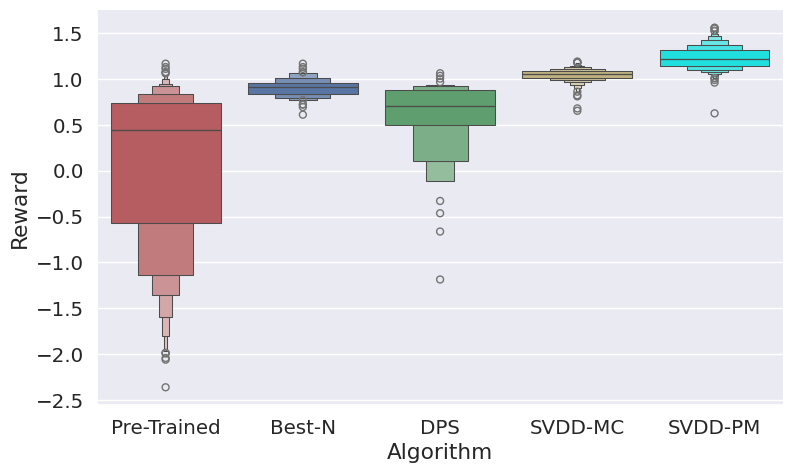

In [99]:

compare = np.concatenate( (pre_trained , bestk, DPS, decoding, decoding2 ), axis= 0)

type1 = ['Pre-Trained' for i in range(len(pre_trained ))]
type2 = ['Best-N' for i in range(len(bestk))]
type3 = ['DPS' for i in range(len(DPS))]
type4 = ['SVDD-MC' for i in range(len(decoding))]
type5 = ['SVDD-PM' for i in range(len(decoding2))]

type =   type1 + type2   + type3 +  type4 + type5
data_dict = {'Algorithm': type, 'Reward': compare }
plot_data = pd.DataFrame(data_dict)
my_pal = {"Pre-Trained": "r", "Best-N": "b", "DPS": "g", "SVDD-MC":"y", "SVDD-PM":"cyan"}
fig = sns.catplot(data=plot_data, x = 'Algorithm', y =  'Reward', hue="Algorithm", kind="boxen" , palette=my_pal, height= 5.0, aspect= 8.2/5.0)
sns.set(font_scale=1.3)
#fig.savefig("media/sequence_DNA.png")
fig.savefig("media/sequence_RNA.png")
#fig.savefig("media/sequence_RNA_stability.png")


In [162]:
data = np.load('./log/dna-HepG2_tw.npz')
decoding  = data['decoding']
pre_trained = data['baseline']

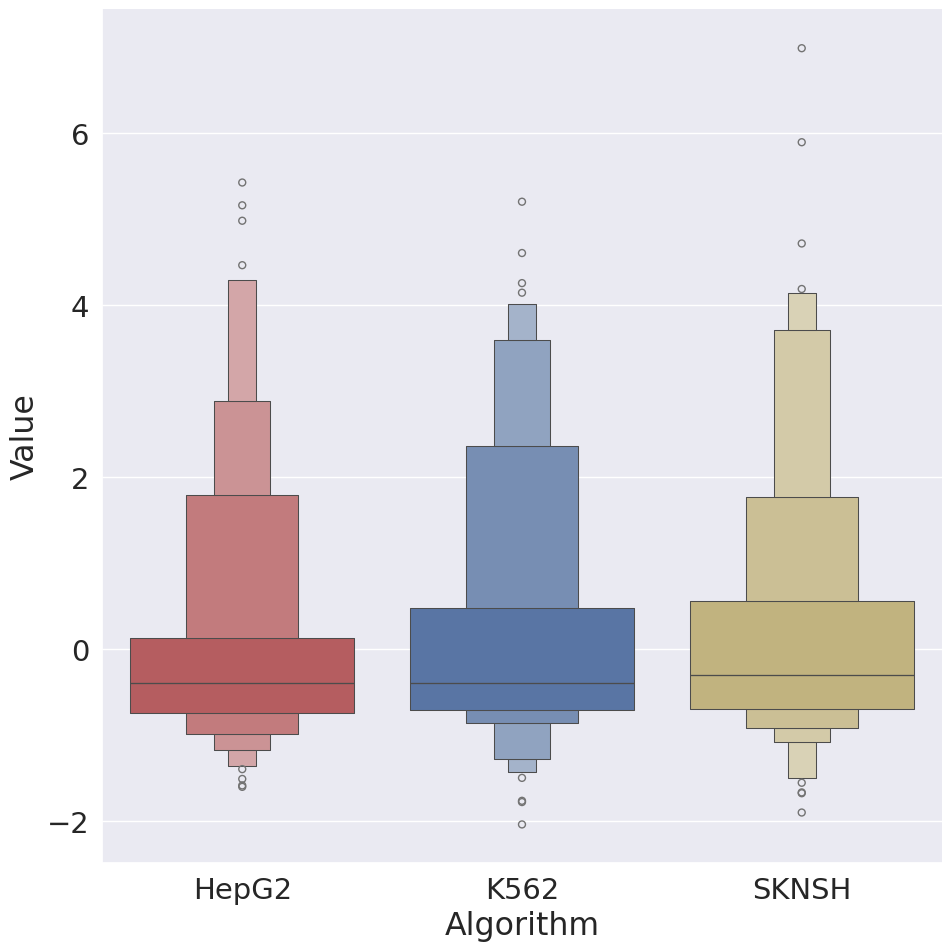

In [163]:
type1 = ['HepG2' for i in range(128)]
type4 = ['K562' for i in range(128)]
type5 = ['SKNSH' for i in range(128)]

type =   type1 + type4 + type5
data_dict = {'Algorithm': type, 'Value': decoding[:,0]  }
plot_data = pd.DataFrame(data_dict)
my_pal = {"HepG2": "r", "K562": "b",  "SKNSH":"y"}
fig = sns.catplot(data=plot_data, x = 'Algorithm', y =  'Value', hue="Algorithm", kind="boxen" , palette=my_pal, height= 10, aspect= 10/10)
sns.set(font_scale=1.9)
#sns.set_context("paper", rc={"figure.figsize": (50, 10)})
fig.savefig("media/sequence_DNA_0.8.png")

In [137]:
print(pre_trained.shape)
print(decoding.shape)

(384, 1)
(384, 1)
